# Preparacion de datos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [3]:
df = pd.read_csv('datos_telecom2.csv')

df['Churn'] = df['Churn'].astype(bool).astype(int)

num_cols = df.select_dtypes(include=['number'])
corr = num_cols.corr()
corr_target = corr['Churn'].sort_values(ascending=False)
print('Correlación con Churn:')
print(corr_target)

Correlación con Churn:
Churn                      1.000000
gasto_diario               0.179774
account.Charges.Monthly    0.179774
account.Charges.Total     -0.190198
customer.tenure           -0.336071
Name: Churn, dtype: float64


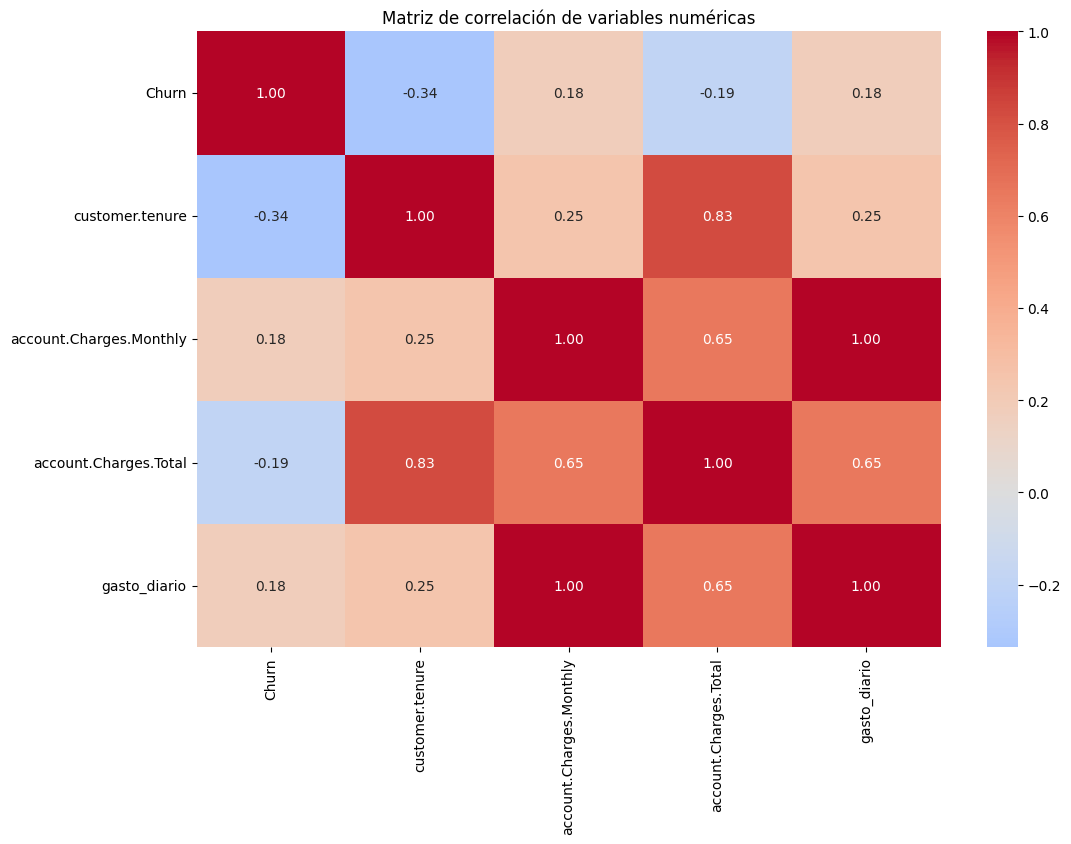

In [4]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de correlación de variables numéricas')
plt.show()

Observa las variables con mayor correlación (positiva o negativa) con `Churn`. Estas serán candidatas importantes para el modelo predictivo.

In [6]:
print(df.columns.tolist())


['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total', 'gasto_diario']


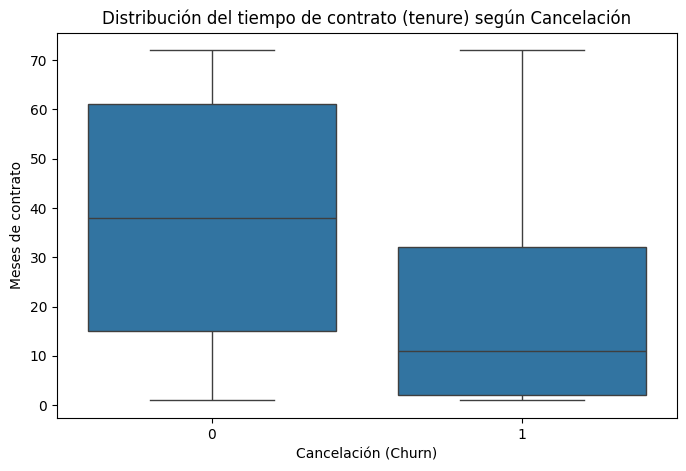

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Distribución del tiempo de contrato (tenure) según Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Meses de contrato')
plt.show()

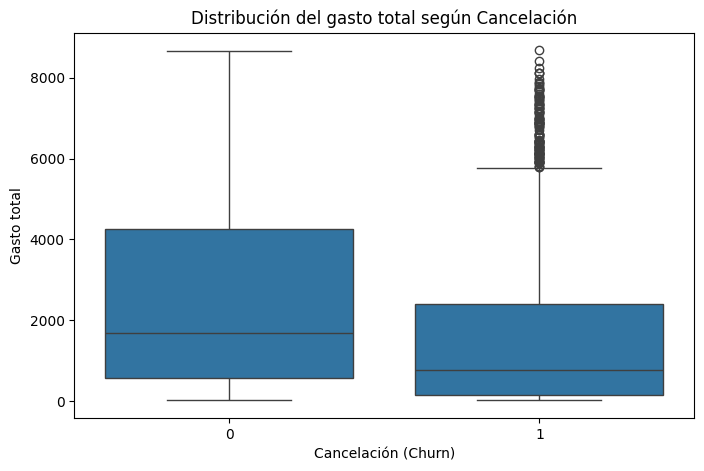

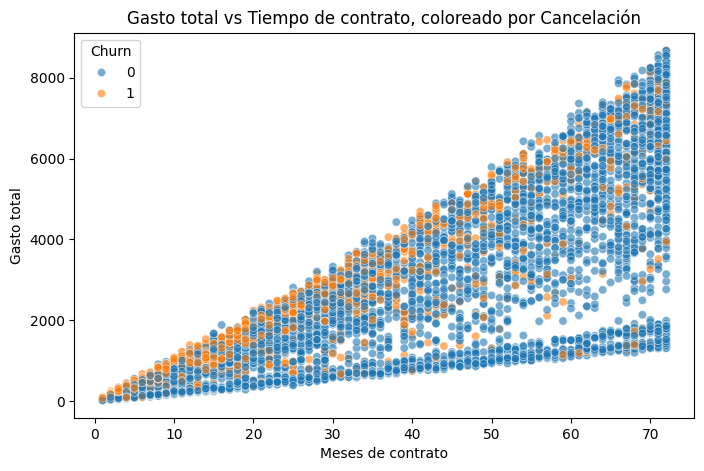

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Distribución del gasto total según Cancelación')
plt.xlabel('Cancelación (Churn)')
plt.ylabel('Gasto total')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df, alpha=0.6)
plt.title('Gasto total vs Tiempo de contrato, coloreado por Cancelación')
plt.xlabel('Meses de contrato')
plt.ylabel('Gasto total')
plt.legend(title='Churn')
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Definir X e y
X = df.drop(['Churn', 'customerID'], axis=1, errors='ignore')
y = df['Churn'].astype(int)   # Convertimos True/False a 0 y 1

# Convertir variables categóricas a variables dummy (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# Dividir en 70% entrenamiento y 30% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamaño entrenamiento: {X_train.shape[0]}")
print(f"Tamaño prueba: {X_test.shape[0]}")


ModuleNotFoundError: No module named 'sklearn'

## Modelos predictivos: Normalización y comparación
A continuación se crean dos modelos para predecir la cancelación de clientes:

- **Modelo 1:** Regresión Logística (requiere normalización)
- **Modelo 2:** Random Forest (no requiere normalización)

La normalización es importante en modelos como Regresión Logística o KNN porque estos algoritmos son sensibles a la escala de las variables. Si las variables tienen diferentes magnitudes, pueden influir desproporcionadamente en el resultado. La normalización asegura que todas las variables contribuyan de manera equitativa.

En cambio, los modelos basados en árboles (como Random Forest) no requieren normalización, ya que dividen los datos en función de umbrales y no de distancias o coeficientes.

In [ ]:
# Modelo 1: Regresión Logística (con normalización)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Normalizar los datos
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_norm, y_train)
y_pred_logreg = logreg.predict(X_test_norm)

print('Regresión Logística (con normalización)')
print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

In [ ]:
# Modelo 2: Random Forest (sin normalización)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest (sin normalización)')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))